In [1]:
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 45.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

In [39]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

df = pdr.get_data_yahoo("MSFT", start="2021-01-01", end="2023-01-01")['Close']
df.columns = {'Close Price'}
df.head()

[*********************100%***********************]  1 of 1 completed


Date
2021-01-04    217.690002
2021-01-05    217.899994
2021-01-06    212.250000
2021-01-07    218.289993
2021-01-08    219.619995
Name: Close, dtype: float64

In [40]:
print(df)

Date
2021-01-04    217.690002
2021-01-05    217.899994
2021-01-06    212.250000
2021-01-07    218.289993
2021-01-08    219.619995
                 ...    
2022-12-23    238.729996
2022-12-27    236.960007
2022-12-28    234.529999
2022-12-29    241.009995
2022-12-30    239.820007
Name: Close, Length: 503, dtype: float64


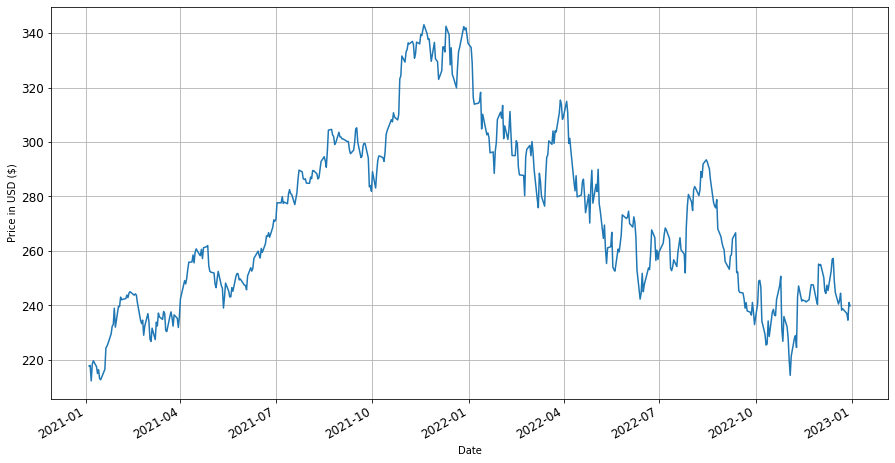

In [41]:
df.plot(figsize=(15,8), fontsize=12)
plt.ylabel('Price in USD ($)')
plt.grid()
plt.show()

In [42]:
df[0]

217.69000244140625

In [55]:
meanPrice = df.rolling(20).mean()
meanPrice = np.round(meanPrice, 3)
print(meanPrice)

Date
2021-01-04        NaN
2021-01-05        NaN
2021-01-06        NaN
2021-01-07        NaN
2021-01-08        NaN
               ...   
2022-12-23    247.170
2022-12-27    246.930
2022-12-28    246.640
2022-12-29    245.933
2022-12-30    245.190
Name: Close, Length: 503, dtype: float64


In [54]:
stdev = df.rolling(20).std()
stdev = np.round(stdev, 3)
print(stdev)

Date
2021-01-04      NaN
2021-01-05      NaN
2021-01-06      NaN
2021-01-07      NaN
2021-01-08      NaN
              ...  
2022-12-23    6.281
2022-12-27    6.583
2022-12-28    7.003
2022-12-29    6.811
2022-12-30    6.613
Name: Close, Length: 503, dtype: float64


In [56]:
upperBand = meanPrice + 2 * stdev
upperBand = np.round(upperBand, 3)
print(upperBand)

Date
2021-01-04        NaN
2021-01-05        NaN
2021-01-06        NaN
2021-01-07        NaN
2021-01-08        NaN
               ...   
2022-12-23    259.732
2022-12-27    260.096
2022-12-28    260.646
2022-12-29    259.555
2022-12-30    258.416
Name: Close, Length: 503, dtype: float64


In [57]:
lowerBand = meanPrice - 2 * stdev
lowerBand = np.round(lowerBand, 3)
print(lowerBand)

Date
2021-01-04        NaN
2021-01-05        NaN
2021-01-06        NaN
2021-01-07        NaN
2021-01-08        NaN
               ...   
2022-12-23    234.608
2022-12-27    233.764
2022-12-28    232.634
2022-12-29    232.311
2022-12-30    231.964
Name: Close, Length: 503, dtype: float64


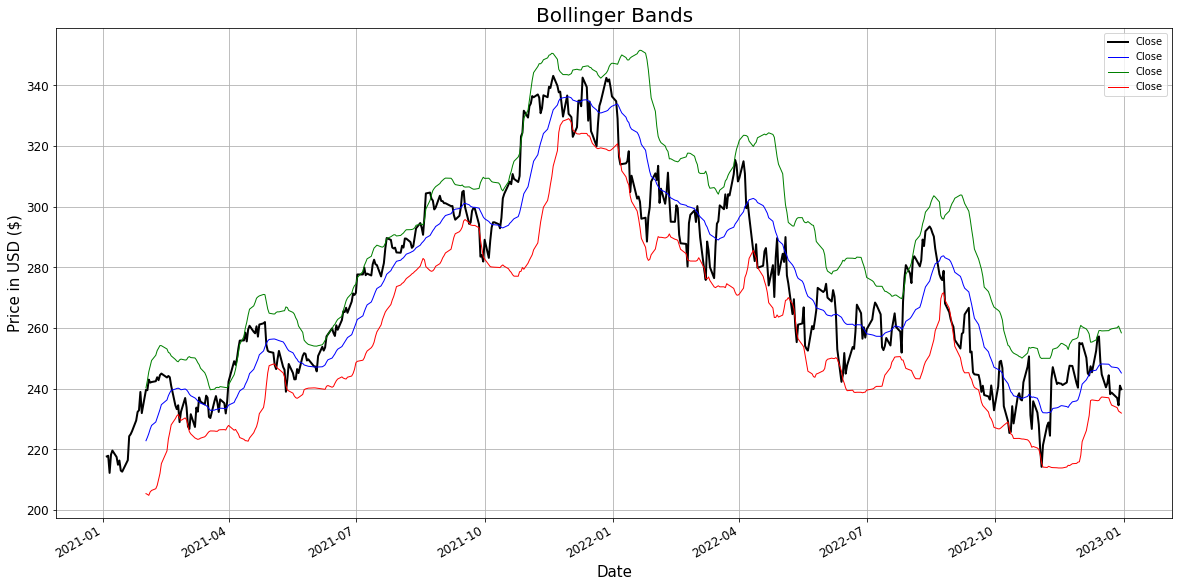

In [60]:
df.plot(c = 'k', figsize=(20,10), lw=2, fontsize=12)
meanPrice.plot(c='b', figsize=(20,10), lw=1)
upperBand.plot(c='g', figsize=(20,10), lw=1)
lowerBand.plot(c='r', figsize=(20,10), lw=1)

plt.title("Bollinger Bands", fontsize=20)
plt.ylabel("Price in USD ($)", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend()
plt.grid()
plt.show()